In [1]:
import pandas as pd
import numpy as np

stocks = pd.read_csv('/home/neerav/work/repo_home.git/Python/NSEAllStocks.csv')
stocks['Symbol'] = stocks['Symbol'].apply(lambda x: str(x) + ".NS")
print (stocks['Symbol'].head(), len(stocks))

(0     20MICRONS.NS
1    3IINFOTECH.NS
2       3MINDIA.NS
3        A2ZMES.NS
4     AANJANEYA.NS
Name: Symbol, dtype: object, 1328)


In [4]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime.today() - datetime.timedelta(days=1)

f=web.DataReader(stocks['Symbol'], 'yahoo', start, end)['Adj Close']
print (f.head(),f.tail())

/usr/local/lib/python2.7/dist-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'A2ZMES.NS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python2.7/dist-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'AANJANEYA.NS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python2.7/dist-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'ACKRUTI.NS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python2.7/dist-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'AHMEDFORGE.NS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python2.7/dist-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'ALFALAVAL.NS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python2.7/dist-packages/panda

(            20MICRONS.NS  3IINFOTECH.NS  3MINDIA.NS  A2ZMES.NS  AANJANEYA.NS  \
Date                                                                           
2006-01-02           NaN         85.270      857.70        NaN           NaN   
2006-01-03           NaN         84.526      890.00        NaN           NaN   
2006-01-04           NaN         83.564      898.70        NaN           NaN   
2006-01-05           NaN         81.832      890.05        NaN           NaN   
2006-01-06           NaN         82.515      895.05        NaN           NaN   

            AARTIDRUGS.NS  AARTIIND.NS  AARVEEDEN.NS  ABAN.NS  ABB.NS   ...    \
Date                                                                    ...     
2006-01-02         25.497        47.39           NaN   538.19  65.150   ...     
2006-01-03         26.282        48.16           NaN   545.87  66.974   ...     
2006-01-04         26.694        48.35           NaN   559.43  67.218   ...     
2006-01-05         26.631        

In [5]:
print f.shape
f = f[f.columns[np.sum(np.isfinite(f))>0]]
print f.shape
f.to_pickle('NSEpricedata.pkl')

(2933, 1316)
(2933, 1172)


In [1]:
import pandas as pd
f = pd.read_pickle('NSEpricedata.pkl')

In [2]:
f = f.ffill().bfill()
f.head()

,20MICRONS.NS,3IINFOTECH.NS,3MINDIA.NS,AARTIDRUGS.NS,AARTIIND.NS,AARVEEDEN.NS,ABAN.NS,ABB.NS,ABCIL.NS,ABGSHIP.NS,...,YESBANK.NS,ZANDUREALT.NS,ZEEL.NS,ZENITHBIR.NS,ZENITHCOMP.NS,ZENSARTECH.NS,ZICOM.NS,ZODIACLOTH.NS,ZYDUSWELL.NS,ZYLOG.NS
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,14.211,85.270,857.70,25.497,47.39,53.74,538.19,65.150,64.51,341.33,...,63.61,505.492,68.550,26.07968,58.23,65.136,184.78,97.11230,187.25,189.044
2006-01-03,14.211,84.526,890.00,26.282,48.16,53.74,545.87,66.974,66.98,341.33,...,64.68,507.419,69.787,26.07968,60.89,65.855,184.78,99.96192,187.25,189.044
2006-01-04,14.211,83.564,898.70,26.694,48.35,53.74,559.43,67.218,68.46,341.33,...,64.17,509.771,70.591,26.07968,61.27,64.516,184.78,98.52896,187.25,189.044
2006-01-05,14.211,81.832,890.05,26.631,48.54,53.74,544.24,68.339,67.34,341.33,...,66.63,514.459,70.113,26.07968,61.86,64.734,184.78,96.83208,187.25,189.044
2006-01-06,14.211,82.515,895.05,26.681,48.60,53.74,541.40,68.451,66.31,341.33,...,66.50,512.691,70.265,26.07968,62.28,64.181,184.78,96.53556,187.25,189.044


In [8]:
returns = np.log(f/f.shift(1))
returns = returns[1:]
print returns.head()

            20MICRONS.NS  3IINFOTECH.NS  3MINDIA.NS  AARTIDRUGS.NS  \
Date                                                                 
2006-01-03           0.0      -0.008764    0.036967       0.030323   
2006-01-04           0.0      -0.011446    0.009728       0.015555   
2006-01-05           0.0      -0.020944   -0.009672      -0.002363   
2006-01-06           0.0       0.008312    0.005602       0.001876   
2006-01-09           0.0       0.003907    0.007513       0.057177   

            AARTIIND.NS  AARVEEDEN.NS   ABAN.NS    ABB.NS  ABCIL.NS  \
Date                                                                  
2006-01-03     0.016118           0.0  0.014169  0.027612  0.037574   
2006-01-04     0.003937           0.0  0.024538  0.003637  0.021856   
2006-01-05     0.003922           0.0 -0.027528  0.016540 -0.016495   
2006-01-06     0.001235           0.0 -0.005232  0.001638 -0.015414   
2006-01-09     0.051725           0.0  0.027581  0.006509  0.010053   

           

In [9]:
print returns.shape
ii = abs(returns.tail(10).sum())>0.
returns = returns[list(ii[ii].index)]
print returns.shape

(2932, 1172)
(2932, 1074)


In [10]:
import numpy as np 
print np.sum(np.sum(abs(returns)>0.5))

4364


In [11]:
for c in returns.columns:returns.ix[abs(returns[c])>0.3,c] = 0
print np.sum(np.sum(returns>0.5))

0


In [12]:
#mu  = np.array(returns.mean())
#cov = np.cov(returns.T)

In [13]:
mu = returns.mean()
cov = (returns-mu).T.dot(returns-mu)

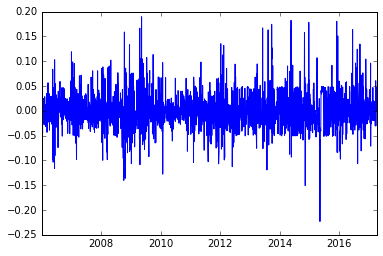

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(returns['3IINFOTECH.NS'])

In [15]:
print mu.shape
print cov.shape
print returns.shape

(1074,)
(1074, 1074)
(2932, 1074)


4282.66347674


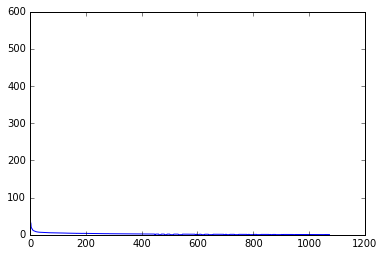

In [16]:
print np.linalg.cond(cov)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.linalg.eigvals(cov))

In [19]:
from scipy import linalg

from sklearn.covariance import LedoitWolf, OAS, ShrunkCovariance, GraphLassoCV, \
    log_likelihood, empirical_covariance

traintestratio = 0.8    
train_test_break = returns.index[int(traintestratio*returns.shape[0])]
print train_test_break
#empirical
emp_cov = empirical_covariance(returns.ix[:train_test_break])
# Ledoit-Wolf optimal shrinkage coefficient estimate
lw = LedoitWolf()
loglik_lw = lw.fit(returns.ix[:train_test_break]).score(returns.ix[train_test_break:])
# OAS coefficient estimate
oa = OAS()
loglik_oa = oa.fit(returns.ix[:train_test_break]).score(returns.ix[train_test_break:])

#graphlasso = GraphLassoCV()
#loglik_glcv = graphlasso.fit(returns.ix[:train_test_break]).score(returns.ix[train_test_break:])

2015-01-08 00:00:00


In [20]:
print lw.shrinkage_
print oa.shrinkage_
#print graphlasso.shrinkage_

0.0182708574749
0.0114892531614


In [22]:
print ('loglike-original:',-log_likelihood(np.array(cov), linalg.inv(np.array(cov))),'loglike-emp:',-log_likelihood(emp_cov, linalg.inv(cov)),'loglike-lw:',-log_likelihood(lw.covariance_, linalg.inv(cov)),'loglike-oas:',-log_likelihood(oa.covariance_, linalg.inv(cov)))
print ('cond-original:',np.linalg.cond(cov),'cond-emp:',np.linalg.cond(emp_cov),'cond-lw:',np.linalg.cond(lw.covariance_),'cond-oas:',np.linalg.cond(oa.covariance_))
eig_vals = pd.DataFrame({'original':np.linalg.eigvals(cov),'empirical':np.linalg.eigvals(emp_cov),'lediot':np.linalg.eigvals(lw.covariance_),'oa':np.linalg.eigvals(oa.covariance_)})
print eig_vals.head()
print eig_vals.tail()


('loglike-original:', 1743.6442850763458, 'loglike-emp:', 1206.8254972623392, 'loglike-lw:', 1206.8320712027635, 'loglike-oas:', 1206.8296311496463)
('cond-original:', 4202.9060624588474, 'cond-emp:', 7533.4519317399745, 'cond-lw:', 4510.9486058578559, 'cond-oas:', 5310.9982097119091)
   empirical    lediot        oa    original
0   0.201043  0.197388  0.198745  565.899704
1   0.013989  0.013751  0.013839   38.724920
2   0.011397  0.011207  0.011278   31.573172
3   0.010807  0.010627  0.010694   27.502683
4   0.007269  0.007153  0.007196   20.624454
      empirical    lediot        oa  original
1069   0.000176  0.000190  0.000185  0.698243
1070   0.000191  0.000205  0.000200  0.726373
1071   0.000197  0.000211  0.000203  0.701192
1072   0.000194  0.000208  0.000206  0.710397
1073   0.000171  0.000185  0.000180  0.688347


In [23]:
#plt.plot(np.linalg.eigvals(cov)[:20],'r')
#plt.plot(np.linalg.eigvals(emp_cov)[:20],'g')
#plt.plot(np.linalg.eigvals(lw.covariance_)[:20],'b')
#plt.plot(np.linalg.eigvals(oa.covariance_)[:20],'y')

In [18]:
from scipy import linalg

from sklearn.covariance import LedoitWolf, OAS, ShrunkCovariance, GraphLassoCV, \
    log_likelihood, empirical_covariance
lw_cov = LedoitWolf().fit(returns).covariance_
print mu.head()
print lw_cov

20MICRONS.NS     0.000328
3IINFOTECH.NS   -0.000967
3MINDIA.NS       0.000900
AARTIDRUGS.NS    0.001092
AARTIIND.NS      0.000957
dtype: float64
[[  7.48566041e-04   1.70126691e-04   6.72639750e-05 ...,   5.82426776e-05
    5.27786839e-05   7.46403642e-05]
 [  1.70126691e-04   1.16246117e-03   1.52019492e-04 ...,   1.77888211e-04
    6.83123574e-05   2.72787727e-04]
 [  6.72639750e-05   1.52019492e-04   4.53312721e-04 ...,   8.49123688e-05
    3.65154324e-05   1.15264882e-04]
 ..., 
 [  5.82426776e-05   1.77888211e-04   8.49123688e-05 ...,   7.10824454e-04
    2.14000960e-05   9.30053143e-05]
 [  5.27786839e-05   6.83123574e-05   3.65154324e-05 ...,   2.14000960e-05
    3.03042039e-04   4.54589383e-05]
 [  7.46403642e-05   2.72787727e-04   1.15264882e-04 ...,   9.30053143e-05
    4.54589383e-05   1.13420577e-03]]


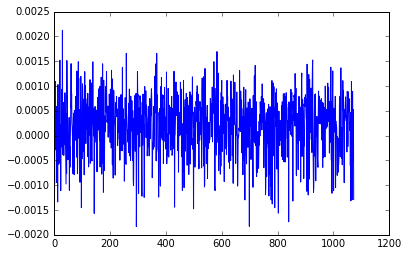

In [19]:
plt.plot(np.array(mu))

In [21]:
#lasso optimization
from cvxpy import *


# Construct the problem.
w = Variable(mu.shape[0])
gamma = Parameter(sign='positive')
risk = quad_form(w,np.array(lw_cov))
ret = w.T*np.array(mu)
wb = pos(w)
ws = neg(w)
prob = Problem(Maximize( ret - gamma*risk ),#- norm(w,1)), 
               [ w>=-0.2,w<=0.2,norm(w, 1) <= 1,
                sum_entries(power(w,0))<20,sum_entries(wb)<=1.3,
                sum_entries(ws)<=0.3])# #long only w >= 0, sum_entires(w)==1
#result = prob.solve()
#print w.value

# Compute trade-off curve.
SAMPLES = 5
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
w_data = []
wb_data = []
ws_data = []
fn_toarray = lambda w: np.array(w.value).reshape(w.value.shape[0],)
gamma_vals = np.logspace(-2, 1.5, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = sqrt(risk).value
    ret_data[i] = ret.value    
    w_,wb_,ws_ = map(fn_toarray,[w,wb,ws])
    #print w_,wb_,ws_
    w_data.append(w_)
    wb_data.append(wb_)
    ws_data.append(ws_)
#print sum_entries(power(w,0)).value
    print (gamma.value,ret.value,sqrt(risk).value,ret.value/sqrt(risk).value,sum(wb_),sum(ws_),sum(w_),np.linalg.norm(w_,1),np.linalg.norm(w_,0))
    #print (gamma,ret,sqrt(risk),ret/sqrt(risk),sum(wb.value),sum(ws.value),sum(w),norm(w,1),np.linalg.norm(w.value,0)

    
#print zip(gamma_vals,ret_data,risk_data)

#for i,j,k in zip(gamma_vals,ret_data,risk_data):
#    print (i, j/k)
#objective = Maximize( w.T*(A*w - b))# + lam*norm1(w))
#constraints = [ sum_entries(w) == 1]#sum_entries(w) <= 1,
#prob = Problem(objective, constraints)

# The optimal objective is returned by prob.solve().
#result = prob.solve()
# The optimal value for x is stored in x.value.
#print w.value
# The optimal Lagrange multiplier for a constraint
# is stored in constraint.dual_value.
#print constraints[0].dual_value


(0.01, 0.0018106233240452226, 0.015725949294962665, 0.115136027090282, 0.70000000160279197, 0.29999999825830054, 0.4000000033444906, 0.99999999986109223, 1074.0)
(0.074989420933245579, 0.0018105402124854318, 0.015575487183450483, 0.11624292653967165, 0.70000000492269221, 0.29999999471939565, 0.40000001020329617, 0.99999999964208852, 1074.0)
(0.56234132519034907, 0.001796008510536748, 0.01308626445177627, 0.13724378848946203, 0.70000000946986163, 0.29999998977016396, 0.40000001969969801, 0.99999999924002614, 1074.0)
(4.2169650342858223, 0.0015809033243137927, 0.007085969675147349, 0.22310331497162647, 0.7000000003096204, 0.2999999995140164, 0.40000000079560388, 0.99999999982363708, 1074.0)
(31.622776601683793, 0.0011464154867871798, 0.0032182781491817422, 0.35622013811287867, 0.69999998512723782, 0.29999999788670167, 0.39999998724053659, 0.99999998301393922, 1074.0)


Populating the interactive namespace from numpy and matplotlib
                   0         1         2         3         4         5  \
Date                                                                     
2006-01-03  1.014488  1.014488  1.014119  1.014079  1.014273  1.013818   
2006-01-04  1.017127  1.017127  1.016577  1.016282  1.019572  1.022283   
2006-01-05  1.005498  1.005498  1.005024  1.005814  1.012685  1.018576   
2006-01-06  1.007922  1.007922  1.007290  1.008050  1.017999  1.026840   
2006-01-09  1.015003  1.015003  1.014174  1.015196  1.024352  1.031943   

                   6         7         8         9  
Date                                                
2006-01-03  1.010953  1.007984  1.005515  1.003232  
2006-01-04  1.019004  1.012764  1.008617  1.005623  
2006-01-05  1.015406  1.010656  1.006832  1.005006  
2006-01-06  1.022624  1.013928  1.007781  1.005540  
2006-01-09  1.030283  1.020380  1.010374  1.006714  
                      0            1           

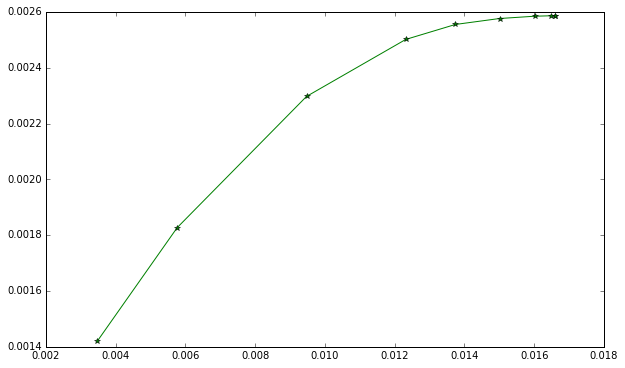

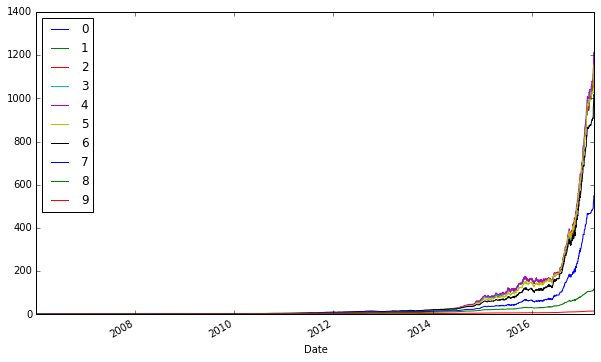

In [74]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
plt.plot(risk_data,ret_data,'g-*')
out = {}
for ii in range(len(w_data)):
    #print list(np.where(np.abs(w)>1e-3)[0])
    w = w_data[ii]
    cols = [ list(returns.columns)[i] for i in list(np.where(np.abs(w)>1e-2)[0])]
    w_final = [ w[i] for i in list(np.where(np.abs(w)>1e-2)[0])]
    #print cols
    #eturns[cols].head()
    out[ii] = (1.+np.sum(returns[cols]*w_final,1)).cumprod()
    weights = pd.Series(dict(zip(cols,w_final)))
    #print weights.sort_values(ascending=False)
    #print weights.shape
    
dd = pd.DataFrame(out)
print dd.head()
print dd.tail()
dd.plot()

In [32]:
np.linalg.norm(w_,0)

1074.0

(0.10000000000000001, 5.591667085575251e-17, 5.585035603475234e-18, 10.01187366128139, 0, 1.8114400565570627e-14)


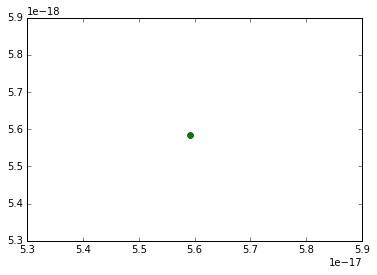

In [33]:
lam = Parameter(sign='positive')
prob = Problem(Maximize( ret - gamma*risk - lam*norm(w,1)), #having the constraint of norm(w,1) implies lasso with lambda 1
               [sum_entries(w) == 0,norm(w, 1) <= 1])#, sum_entries(power(w,0))>5,sum_entries(power(w,0))<20])#long only w >= 0
#result = prob.solve()
#print w.value

# Compute trade-off curve.
SAMPLES = 1
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
result_data = np.zeros(SAMPLES)
w_data = []
#gamma_vals = np.logspace(0,2,num=SAMPLES)
lambda_vals = np.logspace(-1,3,num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = 1.
    lam.value = lambda_vals[i]
    result_data[i] = prob.solve()
    if w is not None:
        risk_data[i] = sqrt(risk).value
        ret_data[i] = ret.value
        w_data.append(np.array(w.value).reshape(w.value.shape[0],))
        print (lam.value,sqrt(risk).value,ret.value,sqrt(risk).value/ret.value,sum(np.abs(w_data[-1])>1e-3),np.linalg.norm(w_data[-1],1))
#print zip(lambda_vals,ret_data,risk_data)
    
plt.plot(risk_data,ret_data,'go')
#for w, i,j,k in zip(w_data,lambda_vals,ret_data,risk_data):
#    print (i, j/k, sum(np.abs(w)>1e-3),np.linalg.norm(w,1) )

In [34]:
print norm(w,1).value,ret.value,risk.value
print sum_entries(power(w,0))

1.81144005656e-14 5.58503560348e-18 3.12667407959e-33
sum_entries(power(var35, 0))


In [35]:
print zip(lambda_vals,result_data,risk_data,ret_data)

[(0.10000000000000001, 3.0070688207422374e-13, 5.5916670855752514e-17, 5.5850356034752342e-18)]


0
10


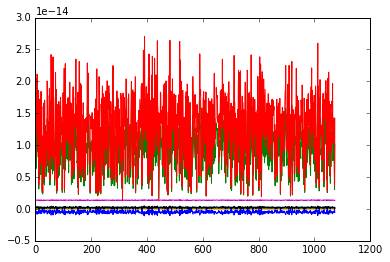

In [44]:
for w in w_data: plt.plot(w)
print sum(w<0)
print len(w_data)

In [43]:
w = np.array(w.value)
print list(np.where(np.abs(w)>1e-3)[0])
cols = [ list(returns.columns)[i] for i in list(np.where(np.abs(w)>1e-3)[0])]
print cols
returns[cols].head()
print np.cumsum(np.sum(returns*w,1)).head()
print np.cumsum(np.sum(returns*w,1)).tail()
plt.plot(np.cumsum(np.sum(returns*w,1)))

[]
[]


ValueError: Unable to coerce to DataFrame, shape must be (2932, 1074): given (1074, 1)

In [39]:
list(returns.columns)

['20MICRONS.NS',
 '3IINFOTECH.NS',
 '3MINDIA.NS',
 'AARTIDRUGS.NS',
 'AARTIIND.NS',
 'AARVEEDEN.NS',
 'ABAN.NS',
 'ABB.NS',
 'ABGSHIP.NS',
 'ABIRLANUVO.NS',
 'ACC.NS',
 'ACE.NS',
 'ACROPETAL.NS',
 'ADANIENT.NS',
 'ADANIPOWER.NS',
 'ADFFOODS.NS',
 'ADHUNIK.NS',
 'ADORWELD.NS',
 'ADSL.NS',
 'ADVANIHOTR.NS',
 'AEGISCHEM.NS',
 'AFL.NS',
 'AGCNET.NS',
 'AGRODUTCH.NS',
 'AHLEAST.NS',
 'AHLUCONT.NS',
 'AHLWEST.NS',
 'AIAENG.NS',
 'AICHAMP.NS',
 'AJANTPHARM.NS',
 'AJMERA.NS',
 'AKSHOPTFBR.NS',
 'AKZOINDIA.NS',
 'ALBK.NS',
 'ALCHEM.NS',
 'ALEMBICLTD.NS',
 'ALICON.NS',
 'ALKALI.NS',
 'ALKYLAMINE.NS',
 'ALLCARGO.NS',
 'ALLSEC.NS',
 'ALMONDZ.NS',
 'ALOKTEXT.NS',
 'ALPHAGEO.NS',
 'ALPSINDUS.NS',
 'AMARAJABAT.NS',
 'AMBIKCO.NS',
 'AMBUJACEM.NS',
 'AMDIND.NS',
 'AMTEKAUTO.NS',
 'ANANTRAJ.NS',
 'ANDHRABANK.NS',
 'ANDHRACEMT.NS',
 'ANDHRSUGAR.NS',
 'ANGIND.NS',
 'ANIKINDS.NS',
 'ANSALAPI.NS',
 'ANSALHSG.NS',
 'ANTGRAPHIC.NS',
 'APARINDS.NS',
 'APCOTEXIND.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTEC

[(0.10000000000000001, 4.0432397432676789e-18, 8.4614346609884757e-17)]
(0.10000000000000001, 0.04778432860693322, 0, 2.0457527047281334e-14)


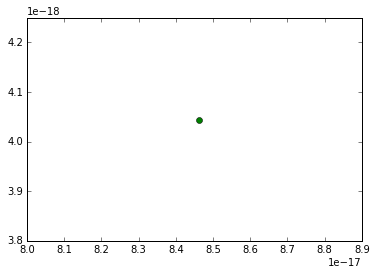

In [30]:
w_data = [np.array(w).reshape(w.shape[0],) for w in w_data]
print zip(lambda_vals,ret_data,risk_data)
plt.plot(risk_data,ret_data,'go')
for w, i,j,k in zip(w_data,lambda_vals,ret_data,risk_data):
    print (i, j/k, sum(np.abs(w)>1e-3),np.linalg.norm(w,1) )

In [31]:
lambda_vals,result_data

(array([ 0.1]), array([  2.66506889e-13]))

In [32]:
aa = np.array(w.value).reshape(w.value.shape[0],)
print sum(np.abs(aa)>1e-3)
print np.linalg.norm(aa,1)

AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [33]:
print sum(np.array(w.value)>1e-2)
print np.linalg.norm(np.array(w.value),0)

AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [62]:
print np.linalg.norm(np.array([1,2,3,0]),0)

3

In [67]:
sharpe_per_stock = (mu/np.diag(cov))
print sharpe_per_stock.sort_values(ascending=False)

ASIANPAINT.NS    0.001488
DHANUKA.NS       0.001292
BRITANNIA.NS     0.001273
VGUARD.NS        0.001217
CRISIL.NS        0.001214
LUPIN.NS         0.001197
SUNDARMFIN.NS    0.001182
CADILAHC.NS      0.001170
PGHH.NS          0.001159
PAGEIND.NS       0.001156
COLPAL.NS        0.001135
VINATIORGA.NS    0.001112
MARICO.NS        0.001092
SUPREMEIND.NS    0.001086
PIDILITIND.NS    0.001052
SHREECEM.NS      0.001049
AJANTPHARM.NS    0.001016
GRUH.NS          0.001015
EICHERMOT.NS     0.000994
BOSCHLTD.NS      0.000987
ITC.NS           0.000958
GSKCONS.NS       0.000949
AMARAJABAT.NS    0.000939
KANSAINER.NS     0.000936
SUNPHARMA.NS     0.000935
DIVISLAB.NS      0.000925
DABUR.NS         0.000921
CANFINHOME.NS    0.000918
TORNTPHARM.NS    0.000888
ASHIANA.NS       0.000888
                   ...   
GREENPOWER.NS   -0.000206
UNITEDBNK.NS    -0.000206
KANORICHEM.NS   -0.000207
UMESLTD.NS      -0.000207
DBREALTY.NS     -0.000212
HINDCOPPER.NS   -0.000213
SURANACORP.NS   -0.000222
FARMAXIND.NS

In [77]:
print sharpe_per_stock.sort_values(ascending=False).tail(100).index.shape
print (f.tail(1)[sharpe_per_stock.sort_values(ascending=False).tail(100).index]>10).sum()

(100,)
HANUNG.NS        0
PVP.NS           0
TEXMOPIPES.NS    1
PARACABLES.NS    0
TI.NS            1
EASTSILK.NS      0
VIJSHAN.NS       1
ESL.NS           0
PUNJLLOYD.NS     1
PDPL.NS          1
IVRCLINFRA.NS    0
RCOM.NS          1
VIDEOIND.NS      1
MANDHANA.NS      1
DIAPOWER.NS      1
VASCONEQ.NS      1
TRICOM.NS        0
BGRENERGY.NS     1
ZENITHBIR.NS     0
CYBERMEDIA.NS    1
UNITY.NS         0
ABGSHIP.NS       1
ASIL.NS          0
MTNL.NS          1
INDSWFTLTD.NS    0
ISMTLTD.NS       0
ASIANHOTNR.NS    1
KAUSHALYA.NS     0
EUROCERA.NS      0
ORBITCORP.NS     0
                ..
GREENPOWER.NS    1
UNITEDBNK.NS     1
KANORICHEM.NS    1
UMESLTD.NS       0
DBREALTY.NS      1
HINDCOPPER.NS    1
SURANACORP.NS    0
FARMAXIND.NS     0
GTOFFSHORE.NS    1
PRADIP.NS        0
CCCL.NS          0
KSK.NS           1
ZYLOG.NS         0
STERLINBIO.NS    0
SAMTEL.NS        0
BILPOWER.NS      0
JPINFRATEC.NS    0
FIRSTWIN.NS      0
RAMSARUP.NS      0
USHERAGRO.NS     1
PSL.NS           0
KSERA